In [50]:
%pylab inline
from NearestNeighbors.forecasting_methods import ForecastingMethods
from NearestNeighbors.DelayVectorDB import convert_dates
import pandas as pd
from NearestNeighbors.metrics import mape, mae
from sklearn.preprocessing import MinMaxScaler
pylab.rcParams['figure.figsize'] = (16.0, 9.0)

Populating the interactive namespace from numpy and matplotlib


In [51]:
np.set_printoptions(suppress=True)
file_path = '/Users/rafa/Dropbox/CENACE_forecasting/DEMANDA_NETA_SIN.csv'

df_all = pd.read_csv(file_path, index_col='FECHA')
idx_sub_sampling = [i for i in range(0, df_all.__len__(), 15)]

In [52]:
def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

In [61]:
temp_values = df_all['DEMANDA_NETA_SIN'].values
temp_idx = df_all['DEMANDA_NETA_SIN'].index

f_temp_values = runningMeanFast(temp_values, 5)
df_demanda_neta_sin_filt = pd.DataFrame(f_temp_values, temp_idx, columns=['DEMANDA_NETA_SIN'])


In [62]:
df_filt = df_demanda_neta_sin_filt['DEMANDA_NETA_SIN'][idx_sub_sampling]
df_raw = df_all['DEMANDA_NETA_SIN'][idx_sub_sampling]

In [63]:
df_filt = df_filt[:df_filt.index.get_loc('2018-06-25 00:00:00')]
df_raw = df_raw[:df_raw.index.get_loc('2018-06-25 00:00:00')]

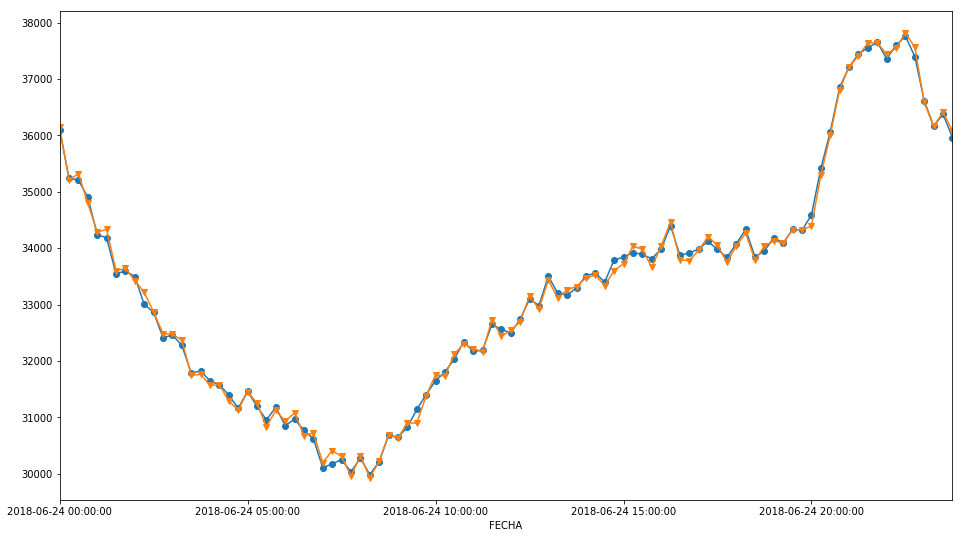

In [65]:
df_filt[df_filt.index.get_loc('2018-06-24 00:00:00'):].plot(marker='o')
df_raw[df_raw.index.get_loc('2018-06-24 00:00:00'):].plot(marker='v')